In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy_financial as npf

In [188]:
#смоделируем спрос с логнормальным распределением, матожиданием 2500 и стандартным отклонением 500
np.random.seed(41)
mean_log = 2500
std_log = 500

#из данных матожидания и стандартного отклонения для логнормального распределения находим параметры нормального для использования в np.random
mean_normal = np.log(mean_log)-((np.log(std_log**2 + mean_log**2)/(mean_log**2))/2)
std_normal = np.sqrt((np.log((std_log**2 + mean_log**2)/mean_log**2)))

#моделируем 10000 дней, в течение которых мог предъявляться спрос по высчитанным нами характеристикам
demand = np.array(np.random.lognormal(mean_normal, std_normal, 10000)).astype('int32')
print(demand)

[2369 2552 2627 ... 2942 2414 1959]


In [194]:
#Для стандартного отклонения 1000 всё аналогично
std_log_1 = 1000
mean_normal_1 = np.log(mean_log)-((np.log(std_log_1**2 + mean_log**2)/(mean_log**2))/2)
std_normal_1 = np.sqrt((np.log((std_log_1**2 + mean_log**2)/mean_log**2)))
demand_1 = np.array(np.random.lognormal(mean_normal, std_normal, 10000)).astype('int32')
print(demand_1)

[2692 1697 2356 ... 2961 1909 2886]


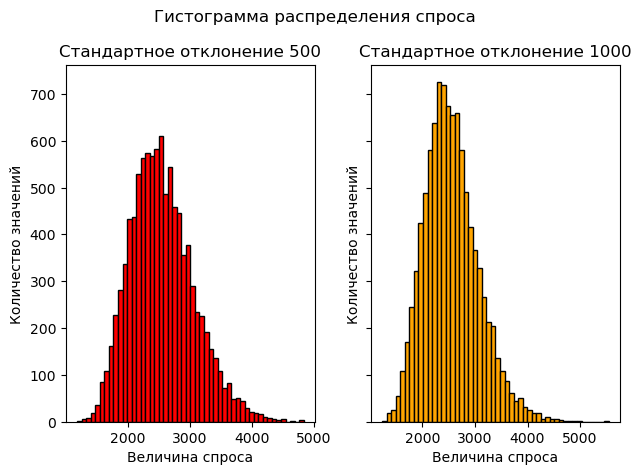

In [221]:
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
axs[0].hist(demand, bins = 50, color = 'red', ec = 'k')
axs[0].set_xlabel('Величина спроса')
axs[0].set_ylabel('Количество значений')
axs[0].set_title('Стандартное отклонение 500')

axs[1].hist(demand_1, bins = 50, color = 'orange', ec = 'k')
axs[1].set_xlabel('Величина спроса')
axs[1].set_ylabel('Количество значений')
axs[1].set_title('Стандартное отклонение 1000')
fig.suptitle("Гистограмма распределения спроса")
plt.show()

In [196]:
#считаем прибыль для какого-то фиксированного предложения для наглядности
consumer_price = 50
producer_price = 30
utilisation_price = 15
supply_example = 4000

#Считаем прибыль для распределния спроса исходя из логики, что если произвести больше спроса, то остаток придется продавать ниже себестоимости, в обратном случае - не продавать
profit_example = np.where(supply_example > demand,
                          demand*consumer_price + abs(supply_example-demand)*utilisation_price - supply_example*producer_price,
                          supply_example*consumer_price - supply_example*producer_price)
mean_profit_ex = np.mean(profit_example)
median_profit_ex = np.median(profit_example)

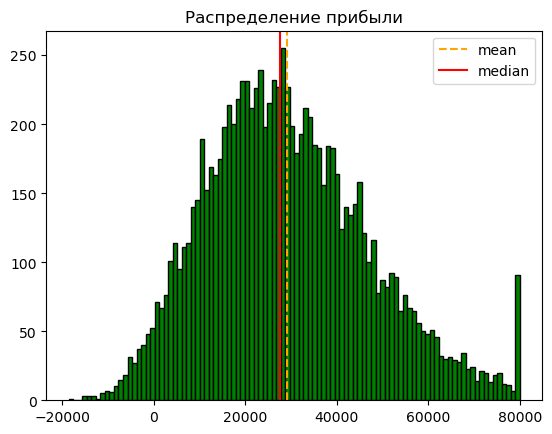

In [222]:
plt.hist(profit_example, bins = 100, color = 'green', ec = 'k')
plt.title('Распределение прибыли')
plt.axvline(mean_profit_ex, linestyle = '--', label = 'mean', color = 'orange')
plt.axvline(median_profit_ex, linestyle = '-', label = 'median', color = 'red')
plt.legend()
plt.show()

In [200]:
#пишем функции для поиска медианы и среднего от распределений приыбли выше
#устанавливаем радиус рассмотрения исходя из правила 3-сигма
supply_range = np.arange(1000, 4000)
def mean_profit(supply):
    meann = np.mean(np.where(supply > demand, demand*50 + abs(supply - demand)*15 - supply*30, supply*50 - supply*30))
    return(meann)
    
def median_profit(supply):
    mediann = np.median(np.where(supply > demand, demand*50 + abs(supply - demand)*15 - supply*30, supply*50 - supply*30))
    return(mediann)

#Преобразуем функции таким образом, чтобы они принимать не 1 значение предложения, а интересующий нас массив
stat_profit = np.vectorize(mean_profit)
median_stat_profit = np.vectorize(median_profit)

#ОТВЕТ НА 1 ВОПРОС
print(stat_profit(supply_range))
print(median_stat_profit(supply_range))


[20000.     20020.     20040.     ... 29234.6145 29219.9015 29205.1885]
[20000. 20020. 20040. ... 27685. 27670. 27655.]


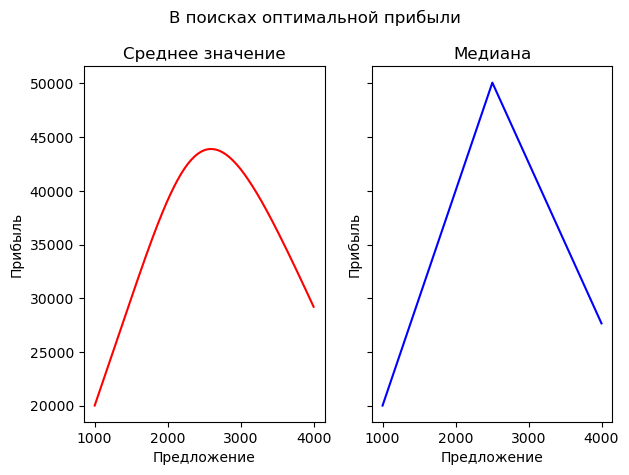

In [198]:
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
axs[0].plot(mean_, stat_profit(supply_range), color = 'red')
axs[0].set_xlabel('Предложение')
axs[0].set_ylabel('Прибыль')
axs[0].set_title('Среднее значение')

axs[1].plot(supply_range, median_stat_profit(supply_range), color = 'blue')
axs[1].set_xlabel('Предложение')
axs[1].set_ylabel('Прибыль')
axs[1].set_title('Медиана')
fig.suptitle('В поисках оптимальной прибыли')
plt.show()

In [201]:
#с изменённым стандартным отклонением
#увеличили область рассмотрения предложения
supply_range = np.arange(0, 5500)
def mean_profit_1(supply):
    meann = np.mean(np.where(supply > demand_1, demand_1*50 + abs(supply - demand_1)*15 - supply*30, supply*50 - supply*30))
    return(meann)
    
def median_profit_1(supply):
    mediann = np.median(np.where(supply > demand_1, demand_1*50 + abs(supply - demand_1)*15 - supply*30, supply*50 - supply*30))
    return(mediann)
    
stat_profit_1 = np.vectorize(mean_profit_1)
median_stat_profit_1 = np.vectorize(median_profit_1)

#ОТВЕТ НА 1 ВОПРОС
print(stat_profit_1(supply_range))
print(median_stat_profit_1(supply_range))

[   0.       20.       40.     ... 6904.8825 6889.886  6874.8895]
[   0.   20.   40. ... 5255. 5240. 5225.]


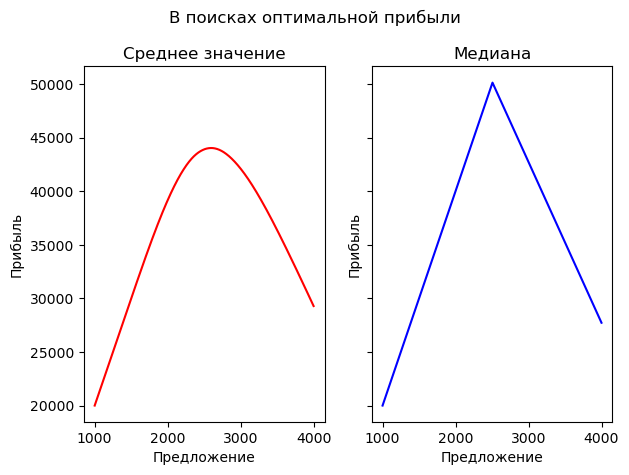

In [199]:
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
axs[0].plot(supply_range, stat_profit_1(supply_range), color = 'red')
axs[0].set_xlabel('Предложение')
axs[0].set_ylabel('Прибыль')
axs[0].set_title('Среднее значение')

axs[1].plot(supply_range, median_stat_profit_1(supply_range), color = 'blue')
axs[1].set_xlabel('Предложение')
axs[1].set_ylabel('Прибыль')
axs[1].set_title('Медиана')
fig.suptitle('В поисках оптимальной прибыли')
plt.show()

In [112]:
#найдём оптимальное количество печенья через индекс максимума собранных матожиданий
#ОТВЕТ НА 2 ВОПРОС
best_supply = np.argmax(stat_profit(supply_range)) + 1000
print(best_supply, max(stat_profit(supply_range)))

2591 43964.66195


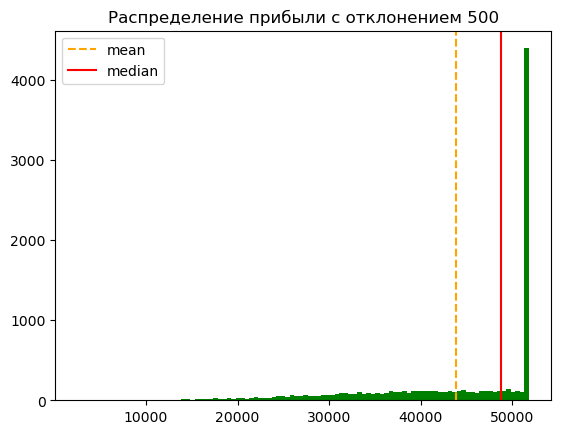

In [211]:
#визуализация
best_profit_distribution = np.where(best_supply > demand,
                          demand*consumer_price + abs(best_supply-demand)*utilisation_price - best_supply*producer_price,
                          best_supply*consumer_price - best_supply*producer_price)
plt.hist(best_profit_distribution, bins = 100, color = 'green')
plt.title('Распределение прибыли с отклонением 500')
plt.axvline(np.mean(best_profit_distribution), linestyle = '--', label = 'mean', color = 'orange')
plt.axvline(np.median(best_profit_distribution), linestyle = '-', label = 'median', color = 'red')
plt.legend()
plt.show()

In [111]:
#с изменённым стандартным отклонением
#ОТВЕТ НА 2 ВОПРОС
best_supply_1 = np.argmax(stat_profit_1(supply_range)) + 1000
print(best_supply_1, max(stat_profit_1(supply_range)))

2594 43969.4687


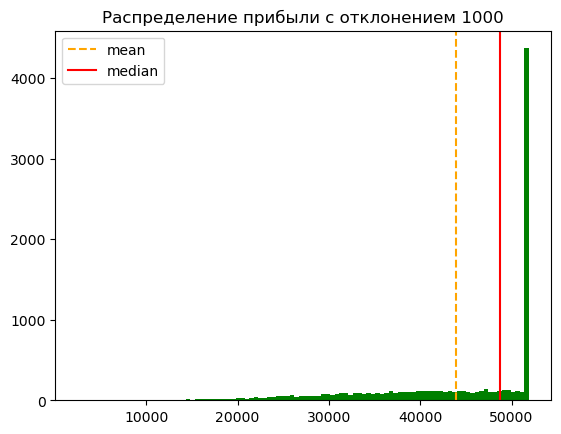

In [210]:
#визуализация
best_profit_distribution_1 = np.where(best_supply_1 > demand,
                          demand*consumer_price + abs(best_supply_1-demand)*utilisation_price - best_supply_1*producer_price,
                          best_supply_1*consumer_price - best_supply_1*producer_price)
plt.hist(best_profit_distribution_1, bins = 100, color = 'green')
plt.title('Распределение прибыли с отклонением 1000')
plt.axvline(np.mean(best_profit_distribution), linestyle = '--', label = 'mean', color = 'orange')
plt.axvline(np.median(best_profit_distribution), linestyle = '-', label = 'median', color = 'red')
plt.legend()
plt.show()

In [223]:
#найдём распределение потерь
losses = np.where( demand < best_supply, (best_supply - demand)*35, (demand - best_supply)*50)
#ОТВЕТ НА ВОПРОС 3
mean_losses = np.mean(losses)
median_losses = np.median(losses)
print(mean_losses, median_losses)

17195.75 14050.0


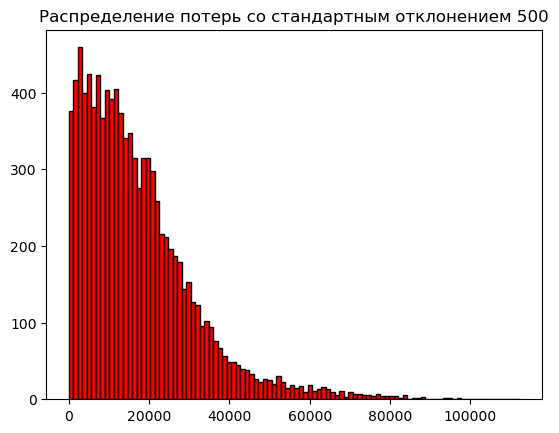

In [224]:
plt.hist(losses, bins = 100, color = 'red', ec = 'k')
plt.title('Распределение потерь со стандартным отклонением 500')
plt.show()

In [215]:
#с изменённым стандартным отклонением
losses_1 = np.where( demand_1 < best_supply_1, (best_supply_1 - demand_1)*35, (demand_1 - best_supply_1)*50)
#ОТВЕТ НА ВОПРОС 3
mean_losses_1 = np.mean(losses_1)
median_losses_1 = np.median(losses_1)
print(mean_losses_1, median_losses_1)

17040.1825 13755.0


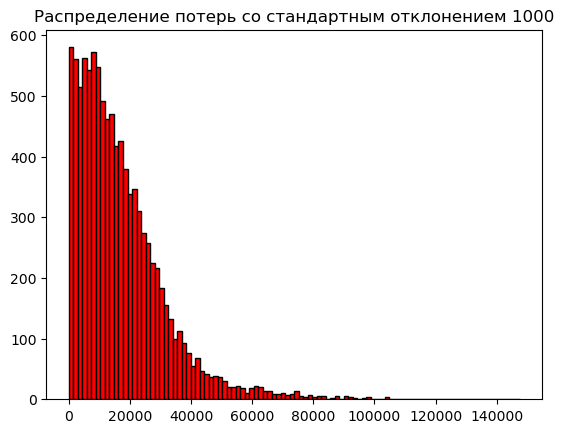

In [225]:
plt.hist(losses_1, bins = 100, color = 'red', ec = 'k')
plt.title('Распределение потерь со стандартным отклонением 1000')
plt.show()

In [ ]:
#Ответ на последний вопрос: изменятся, но незначительно.
#Как это видно по расчётам выше, оптимальное предложение отличается лишь на 3 упаковки, по крайней мере, если использовать среднее в качестве аггрегатора
#Скорее всего связано с тем, что раз разброс значений спроса увеличился, а произвести больше и продать остаток более выгодно, чем не продать, так что в условиях большей неопределённости решение поднять выпуск выглядит разумным